# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [883]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
print(combined_data.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [884]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
print(f"Number of unique mice: {number_of_mice}")

Number of unique mice: 249


In [885]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [886]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
all_duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
all_duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [887]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [888]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_data['Mouse ID'].nunique()
print(f"Number of unique mice in the clean DataFrame: {number_of_mice_clean}")

Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [889]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Variance Tumor Volume': variance_tumor_volume,
    'Standard Deviation Tumor Volume': std_tumor_volume,
    'SEM Tumor Volume': sem_tumor_volume
})

print(summary_stats)


              Mean Tumor Volume  Median Tumor Volume  Variance Tumor Volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Standard Deviation Tumor Volume  SEM 

In [890]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    variance_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', 'sem')
)

print(summary_stats)



              mean_tumor_volume  median_tumor_volume  variance_tumor_volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              std_tumor_volume  sem_tumor_volume  


## Bar and Pie Charts

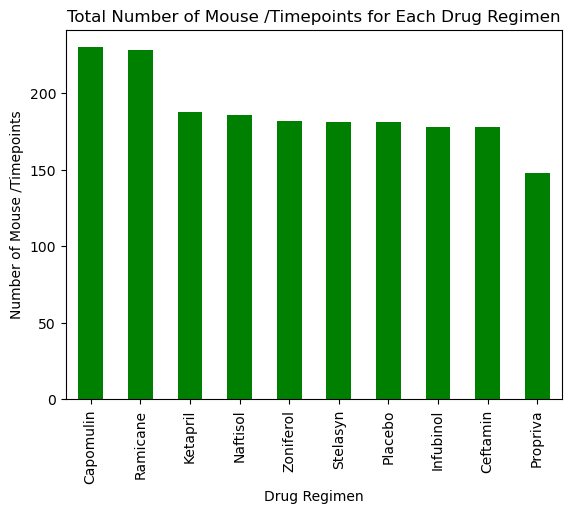

In [891]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = clean_data['Drug Regimen'].value_counts()
timepoint_counts.plot(kind='bar', color='green')
plt.title('Total Number of Mouse /Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse /Timepoints')
plt.show()

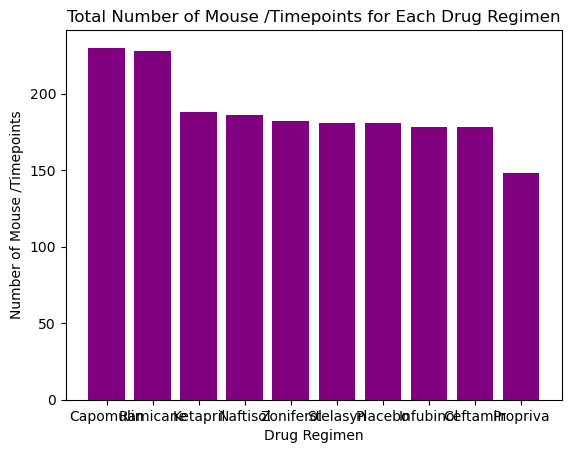

In [892]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_counts = clean_data['Drug Regimen'].value_counts()
plt.figure
plt.bar(timepoint_counts.index, timepoint_counts.values, color='purple')
plt.title('Total Number of Mouse /Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse /Timepoints')
plt.show()

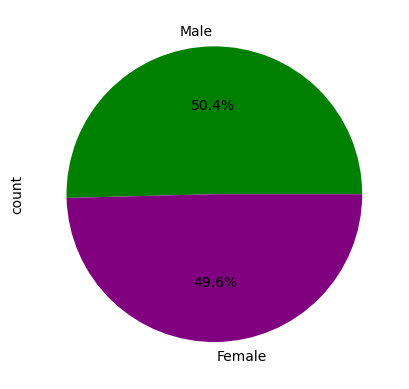

In [893]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()
# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()
# Make the pie chart
colors = ['green', 'purple']
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.show()


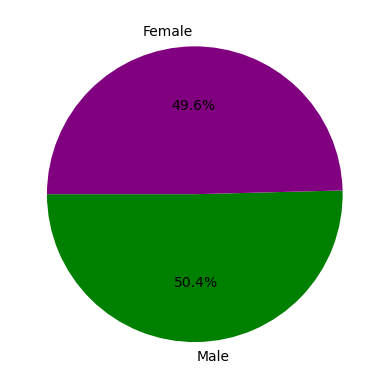

In [894]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()
# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()
colors = ['green', 'purple']
plt.figure
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=180)
plt.show()




# Make the pie chart


## Quartiles, Outliers and Boxplots

In [895]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'])
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = merged_data[merged_data['Drug Regimen'].isin(treatment_regimens)]
final_tumor_volumes.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [896]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
outliers_dict = {}
iqr_dict = {}


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in treatment_regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == regimen]['Tumor Volume (mm3)']


    # add subset
    quartiles = regimen_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    iqr_dict[regimen] = iqr

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)] 
    outliers_dict[regimen] = outliers
for regimen in treatment_regimens:
    print(f"{regimen}'s IQR: {iqr_dict[regimen]}")
    print(f"{regimen}'s potential outliers: {outliers_dict[regimen]}")


Capomulin's IQR: 7.781863460000004
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's IQR: 9.098536719999998
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's IQR: 11.477135160000003
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's IQR: 15.577752179999997
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


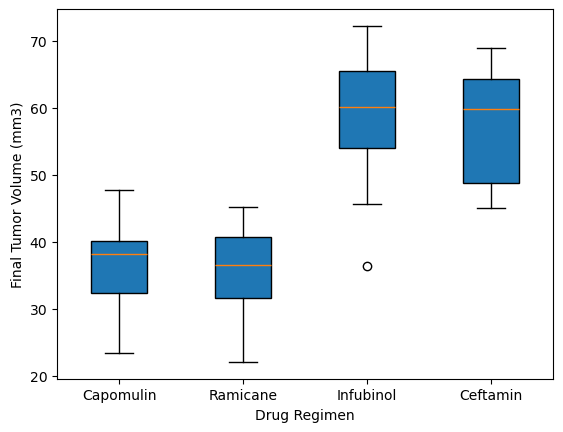

In [897]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
data_to_plot = [final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
                for regimen in treatment_regimens]
plt.figure
plt.boxplot(data_to_plot, labels=treatment_regimens, patch_artist=True, flierprops=dict())
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

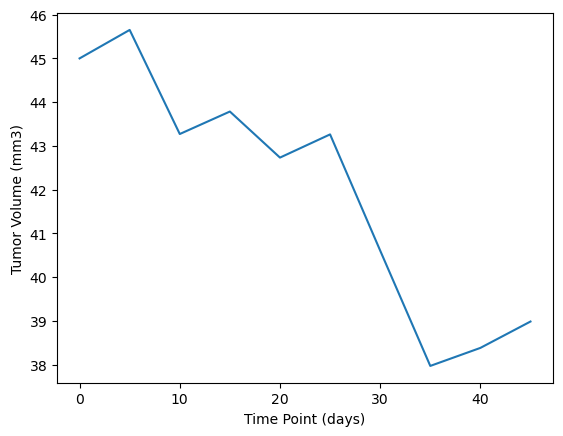

In [898]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == 'Capomulin']['Mouse ID'].iloc[0]
mouse_data = clean_data[clean_data['Mouse ID'] == mouse_id]
plt.figure
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


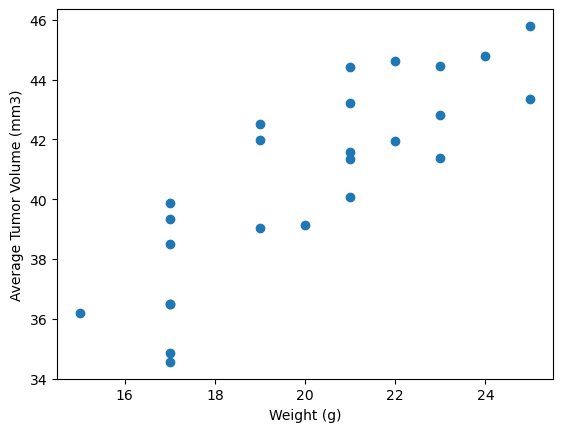

In [899]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID')
plt.figure
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()




## Correlation and Regression

The correlation between mouse weight and the average tumor volume 0.84


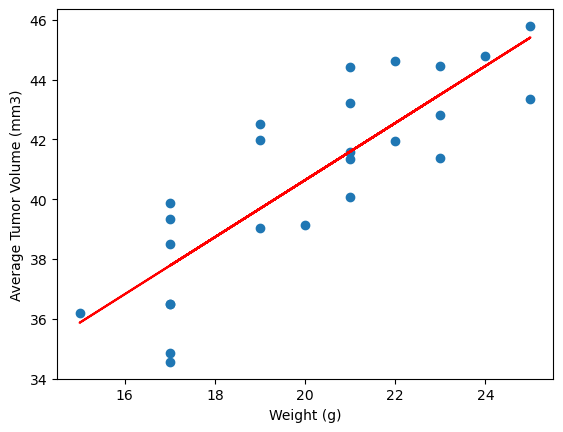

In [900]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])[0]
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.figure()
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and the average tumor volume {correlation:.2f}')
plt.show()